In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

((1470, 35), None)

In [ ]:
df.head()
df.describe()
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Text(0.5, 1.0, 'Attrition Count')

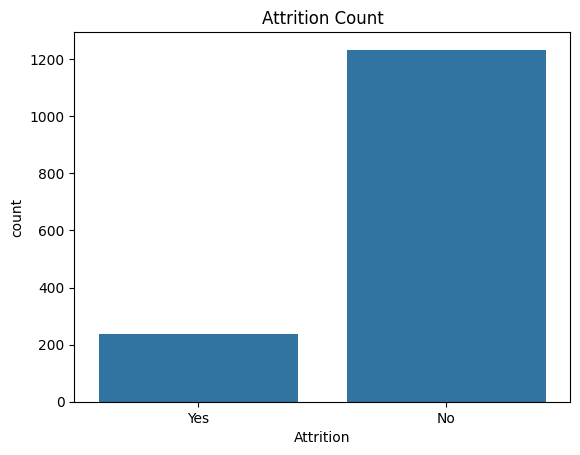

In [ ]:
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Count")


Text(0.5, 1.0, 'Attrition by Department')

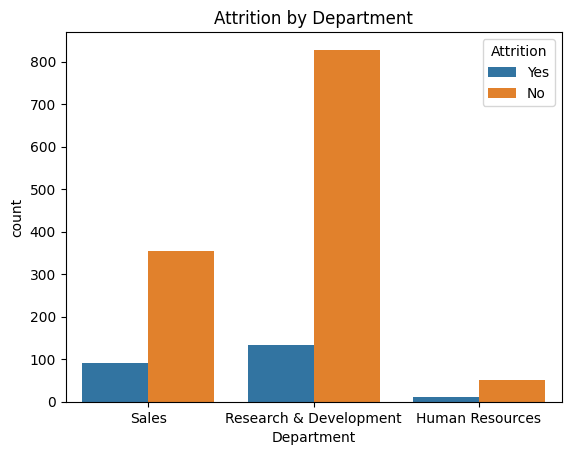

In [ ]:
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")


Text(0.5, 1.0, 'Income vs Attrition')

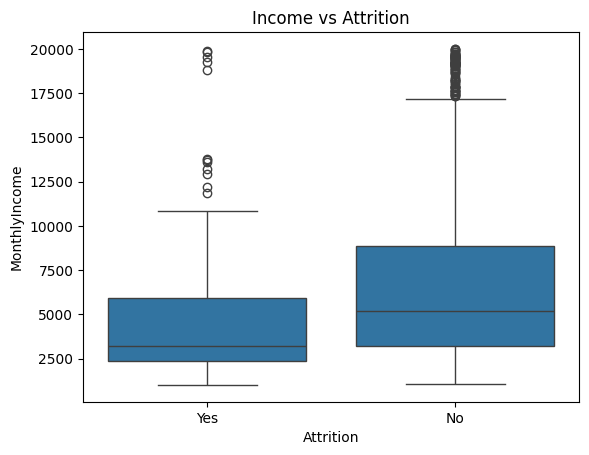

In [ ]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Income vs Attrition")


Text(0.5, 1.0, 'Overtime and Attrition')

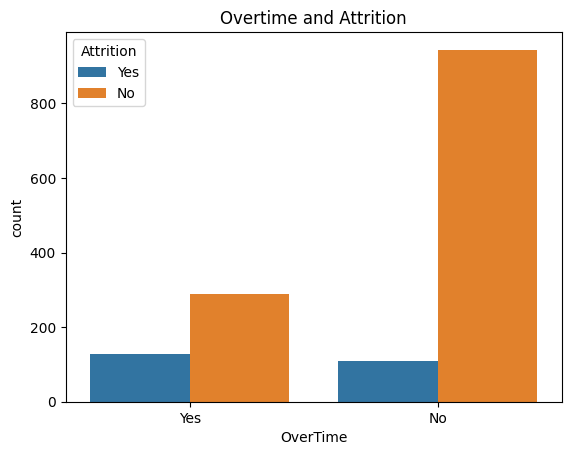

In [ ]:
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Overtime and Attrition")


Text(0.5, 1.0, 'Years at Company vs Attrition')

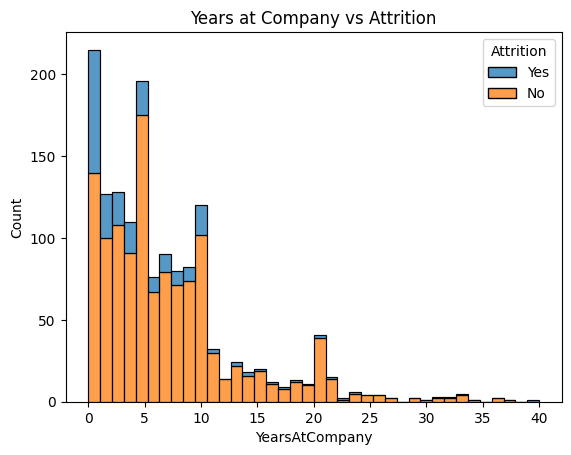

In [ ]:
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack')
plt.title("Years at Company vs Attrition")


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

df_encoded['Attrition'] = le.fit_transform(df_encoded['Attrition'])  # Yes=1, No=0

# Encode all other object columns
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'Attrition':
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8843537414965986
Confusion Matrix:
 [[250   5]
 [ 29  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.67      0.26      0.37        39

    accuracy                           0.88       294
   macro avg       0.78      0.62      0.65       294
weighted avg       0.87      0.88      0.86       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install shap
import shap


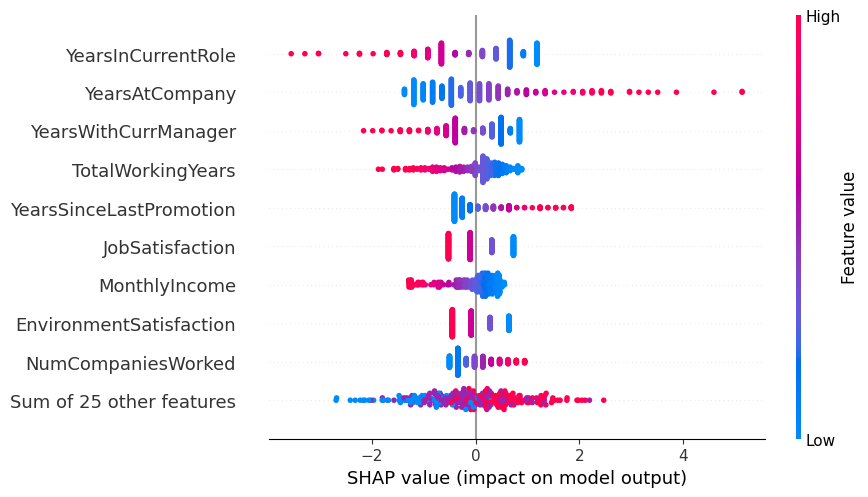

In [ ]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)


In [ ]:
df_encoded.to_csv("cleaned_hr_data.csv", index=False)
print("Exported cleaned dataset for Power BI.")


Exported cleaned dataset for Power BI.


cleaned_hr_data.csv


In [ ]:
from google.colab import files
files.download('cleaned_hr_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>